In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [287]:
prob_heads = .4
num_states = 101

In [288]:
pi = np.zeros((num_states), np.int64)

In [289]:
states = np.arange(0,num_states)

In [290]:
actions = []
for state in states:
    actions.append(np.arange(0, np.minimum(state, num_states-state-1)+1))

In [291]:
def plot_values(V):
    plt.figure(figsize = (8,5))
    plt.plot(np.arange(num_states), V)
    plt.show()
    
def plot_policy(pi):
    plt.figure(figsize = (8,5))
    plt.plot(np.arange(num_states), pi)
    plt.show()

In [292]:
rewards = np.zeros(num_states)

In [293]:
def value_iteration(states, rewards, actions, gamma, theta):
    V = np.zeros((num_states), np.float64)
    V[-1] =1
    while True:
        delta = 0
        for s in states[1:-1]:
            v = V[s]
            bellman_optimality_update(actions, rewards, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    pi = np.zeros(len(actions))
    for s in states[1:-1]:
        q_greedify_policy(actions, rewards, V, pi, s, gamma)
    return V, pi

In [294]:
def q_greedify_policy(actions, rewards, V, pi, s, gamma):
    """Mutate ``pi`` to be greedy with respect to the q-values induced by ``V``."""
    # YOUR CODE HERE
    q = np.zeros(len(actions[s]))
    for a in actions[s]:
        q[a] = prob_heads*(rewards[s+a]+gamma*V[s+a])+(1-prob_heads)*(rewards[s-a]+gamma*V[s-a])
    pi[s] = np.argmax(q)
    return pi

In [295]:
def bellman_optimality_update(actions, rewards, V, s, gamma):
    """Mutate ``V`` according to the Bellman optimality update equation."""
    # YOUR CODE HERE
    q = np.zeros(len(actions[s]))
    for a in actions[s]:
        q[a] = prob_heads*(rewards[s+a]+gamma*V[s+a])+(1-prob_heads)*(rewards[s-a]+gamma*V[s-a])
    V[s] = q.max()
    return V

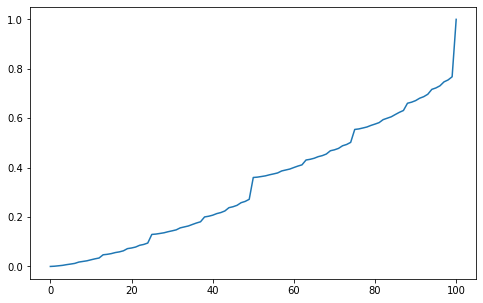

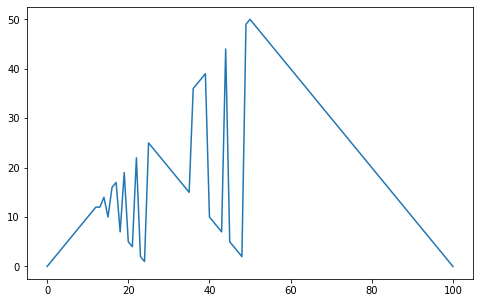

(None,
 None,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        12., 14., 10., 16., 17.,  7., 19.,  5.,  4., 22.,  2.,  1., 25.,
        24., 23., 22., 21., 20., 19., 18., 17., 16., 15., 36., 37., 38.,
        39., 10.,  9.,  8.,  7., 44.,  5.,  4.,  3.,  2., 49., 50., 49.,
        48., 47., 46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36.,
        35., 34., 33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23.,
        22., 21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,
         9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.]))

In [296]:
gamma = .9
theta = 1e-60
V, pi = value_iteration(states, rewards, actions, gamma, theta)
plot_values(V), plot_policy(pi),pi